# SUMMER ANALYTICS 2024



# Week-1 Assignment

# **Gotta catch 'em all !**

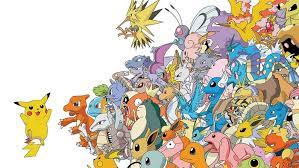

**Welcome to your first assignment of Summer Analytics 2024! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [96]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2) Read the csv file and assign it to a variable .

In [97]:
#your code here
data = pd.read_csv("/content/SA2024_W1_Pokemon.csv")

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [98]:
#your code here
data.shape

(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [99]:
#your code here
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 5) Remove the column '#' and update the dataframe.

In [100]:
#your code here
data.drop(columns=['#'], inplace=True)

### 6) Set the 'Name' column as the index of dataframe

In [101]:
#your code here
data.set_index('Name', inplace=True)

###  7) Print a list of all the unique Type-1 powers

In [102]:
#your code here
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [103]:
#your code here
data['abilities'] = data['Type 1'] + "+" + data['Type 2']
p1 = data[data['Type 1']=='Psychic']
p2 = data[data['Type 2']=='Flying']
len(p1), len(p2)

(57, 97)

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [131]:
#your code here
name = data.index
mega = name.str.contains('Mega')
mega_series = pd.Series(mega)
mega_counts = mega_series.value_counts()
print(mega_counts)

False    751
True      49
Name: count, dtype: int64


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [190]:
#your code here
round(data['Sp. Def'].std(),3)

27.829

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [191]:
#your code here
round(data['Legendary'].mean()*100,3)

8.125

### 4. Name the pokemon(s) with Maximum Defense.

In [120]:
#your code here
defense_max = data[data['Defense']==data['Defense'].max()]
defense_max.index

Index(['SteelixMega Steelix', 'Shuckle', 'AggronMega Aggron'], dtype='object', name='Name')

### 5. Which poison pokemon has the strongest attack ?

In [139]:
#your code here
poison = data[(data['Type 1']=='Poison') | (data['Type 2']=='Poison')]
df = poison[poison['Attack']==poison['Attack'].max()]
df.index

Index(['BeedrillMega Beedrill'], dtype='object', name='Name')

### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

In [ ]:
#your code here


In [ ]:
#your code here


In [ ]:
#your code here


### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [154]:
#your code here
d1 = data[(data['Legendary'] == False) & ((data['Type 1'] == 'Ghost') | (data['Type 2'] == 'Ghost')) & (data['Generation'] == 4)]
d2 = d1.sort_values(by='Speed', ascending=False).iloc[1]
d2

Type 1        Ghost
Type 2          NaN
Total           495
HP               60
Attack           60
Defense          60
Sp. Atk         105
Sp. Def         105
Speed           105
Generation        4
Legendary     False
abilities       NaN
Name: Mismagius, dtype: object

### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [163]:
#your code here
d0 = data[data['Legendary']==False]
d = d0[d0.index=='Charizard']
max_defense = d['Defense'].max()
min_attack = d['Attack'].min()
d1 = d0[(d0['Defense']>max_defense) & (d0['Attack']<min_attack)]
d1.shape[0]

116


## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, here are some bonus questions that you can try to further deepen your understanding of the topic!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [164]:
#your code here
d3 = data[(data['Attack']+data['Sp. Atk'])==(data['Attack']+data['Sp. Atk']).max()]
d3.index

Index(['RayquazaMega Rayquaza', 'DeoxysAttack Forme'], dtype='object', name='Name')

### Which type of legendary pokemons are the most common?

In [174]:
#your code here
d = data[data['Legendary']==True]
count = d['Type 1'].value_counts() + d['Type 2'].value_counts()
count.idxmax()

'Psychic'

### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [180]:
#your code here
x = data[(data['Legendary']==False) & (data['Generation']==6)]
y = data[(data['Legendary']==False) & (data['Generation']==3)]
min_HP_gen6 = x['HP'].min()
z = y[y['HP']>min_HP_gen6]
z.shape[0]

131

### Print out the third slowest pokemon(s) in the dataset.

In [184]:
#your code here
s = data['Speed'].sort_values().iloc[2]
data[data['Speed']==s].index

Index(['Trapinch', 'Bonsly', 'Ferroseed'], dtype='object', name='Name')

### Which pokemon type has the highest average HP?

In [186]:
#your code here
average_hp_by_type1 = data.groupby('Type 1')['HP'].mean()
average_hp_by_type2 = data.groupby('Type 2')['HP'].mean()
(average_hp_by_type1 + average_hp_by_type2).idxmax()

'Dragon'

In [199]:
d = data[data['Legendary']==True]
d1 = d[d['Generation']==4]
print(d1.shape[0])
d2 = d[d['Generation']==6]
print(d2.shape[0])
d3 = d[d['Generation']==1]
print(d3.shape[0])
d4 = d[d['Generation']==5]
print(d4.shape[0])
d5 = d[d['Generation']==3]
print(d5.shape[0])
d6 = d[d['Generation']==2]
print(d6.shape[0])

13
8
6
15
18
5


In [196]:
x1 = data[(data['Type 1']=='Psychic') & (data['Type 2']=='Flying')]
x1.shape[0]

6

In [197]:
data['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

In [202]:
x1 = data[data['Type 2']=='Fairy']
print(x1.shape[0])
x2 = data[data['Type 2']=='Steele']
print(x2.shape[0])
x3 = data[data['Type 2']=='Psychic']
print(x3.shape[0])

23
0
33


In [203]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [213]:
value=[]
for i in data['Type 1'].unique():
  d = data[data['Type 1']==i]
  value.append(d.shape[0])

In [214]:
value

[70, 52, 112, 69, 98, 28, 44, 32, 17, 27, 57, 44, 32, 24, 32, 31, 27, 4]